# Example 1

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
if not os.path.isfile("./Data/Salary_Data.csv"):
    data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv")
    data.to_csv("./Data/Salary_Data.csv")
else:
    data = pd.read_csv("./Data/Salary_Data.csv")

In [16]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.1,39343.0
1,1,1.3,46205.0
2,2,1.5,37731.0
3,3,2.0,43525.0
4,4,2.2,39891.0


In [18]:
data = data.drop("Unnamed: 0", axis=1, errors='ignore')

In [19]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [20]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


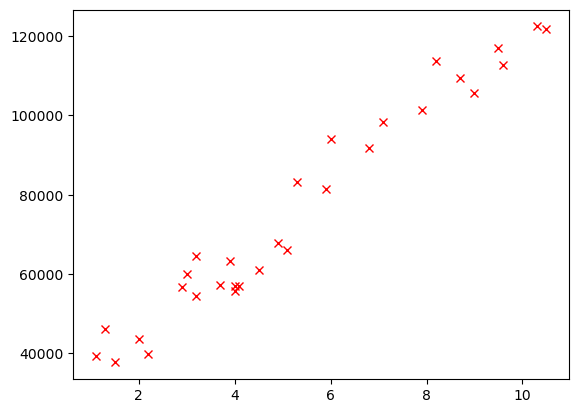

In [22]:
plt.plot(data.YearsExperience, data.Salary,'rx')

In [23]:
# set depandent and independant variable
X = data["YearsExperience"]
y = data["Salary"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
linear_regressor = LinearRegression()
X_train.shape, y_train.shape
X_train = np.array(X_train).reshape((-1, 1))
y_train = np.array(y_train).reshape((-1, 1))
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [33]:
linear_regressor.score(X_test, y_test)

0.9875719650500361

# Interprete the model

In [34]:
print(linear_regressor.intercept_)

print(linear_regressor.coef_)

[25789.06076797]
[[9479.09167874]]


In [38]:
X_test = X_test.reshape((-1, 1))

In [39]:
y_pred = linear_regressor.predict(X_test)

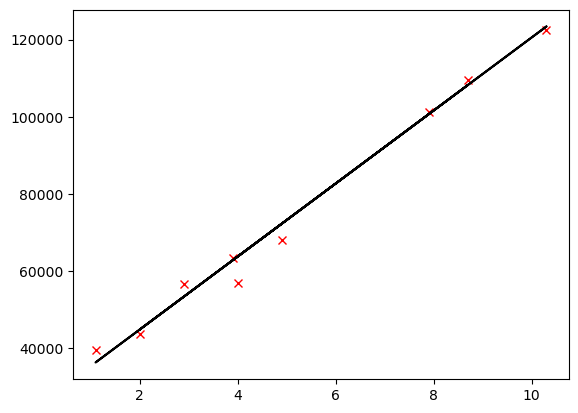

In [40]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

In [41]:
metrics.mean_absolute_error(y_test, y_pred)

2450.548521354498

In [42]:
metrics.mean_squared_error(y_test, y_pred)

9961725.24601648

In [43]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3156.2200883361224

# Example 2

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

In [3]:
df = pd.DataFrame({
    'area' : [2600, 3000, 3200, 2600, 4000],
    'bedrooms' : [3, 4, np.nan, 3, 5],
    'age' : [20, 15, 18, 30, 8],
    'price' : [550, 565, 610, 595, 760]
})

In [4]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550
1,3000,4.0,15,565
2,3200,NaN,18,610
3,2600,3.0,30,595
4,4000,5.0,8,760


In [5]:
pipeline = Pipeline([
    ("fill_nan_values", SimpleImputer())
])

In [7]:
#applies the pipeline to your data and converts the result back into a pandas
pd.DataFrame(pipeline.fit_transform(df), columns=df.columns)

,area,bedrooms,age,price
0,2600.0,3.00,20.0,550.0
1,3000.0,4.00,15.0,565.0
2,3200.0,3.75,18.0,610.0
3,2600.0,3.00,30.0,595.0
4,4000.0,5.00,8.0,760.0


In [8]:
pipeline = Pipeline([
    ("fill_nan_values", SimpleImputer()),
    ("ML_model", LinearRegression())
])

In [9]:
pipeline.fit(df.drop("price", axis=1), df["price"])

Pipeline(steps=[('fill_nan_values', SimpleImputer()),
                ('ML_model', LinearRegression())])

In [10]:
pipeline.predict(df.drop("price", axis=1))

array([534.21572424, 573.30751356, 643.23005422, 585.86173509,
       743.38497289])

In [11]:
pipeline.named_steps["fill_nan_values"].statistics_

array([3080.  ,    3.75,   18.2 ])